# 13.1. Simulating a discrete-time Markov chain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 100  # maximum population size
a = .5 / N  # birth rate
b = .5 / N  # death rate

In [3]:
nsteps = 1000
x = np.zeros(nsteps)
x[0] = 25

In [4]:
for t in range(nsteps - 1):
    if 0 < x[t] < N - 1:
        # Is there a birth?
        birth = np.random.rand() <= a * x[t]
        # Is there a death?
        death = np.random.rand() <= b * x[t]
        # We update the population size.
        x[t + 1] = x[t] + 1 * birth - 1 * death
    # The evolution stops if we reach $0$ or $N$.
    else:
        x[t + 1] = x[t]

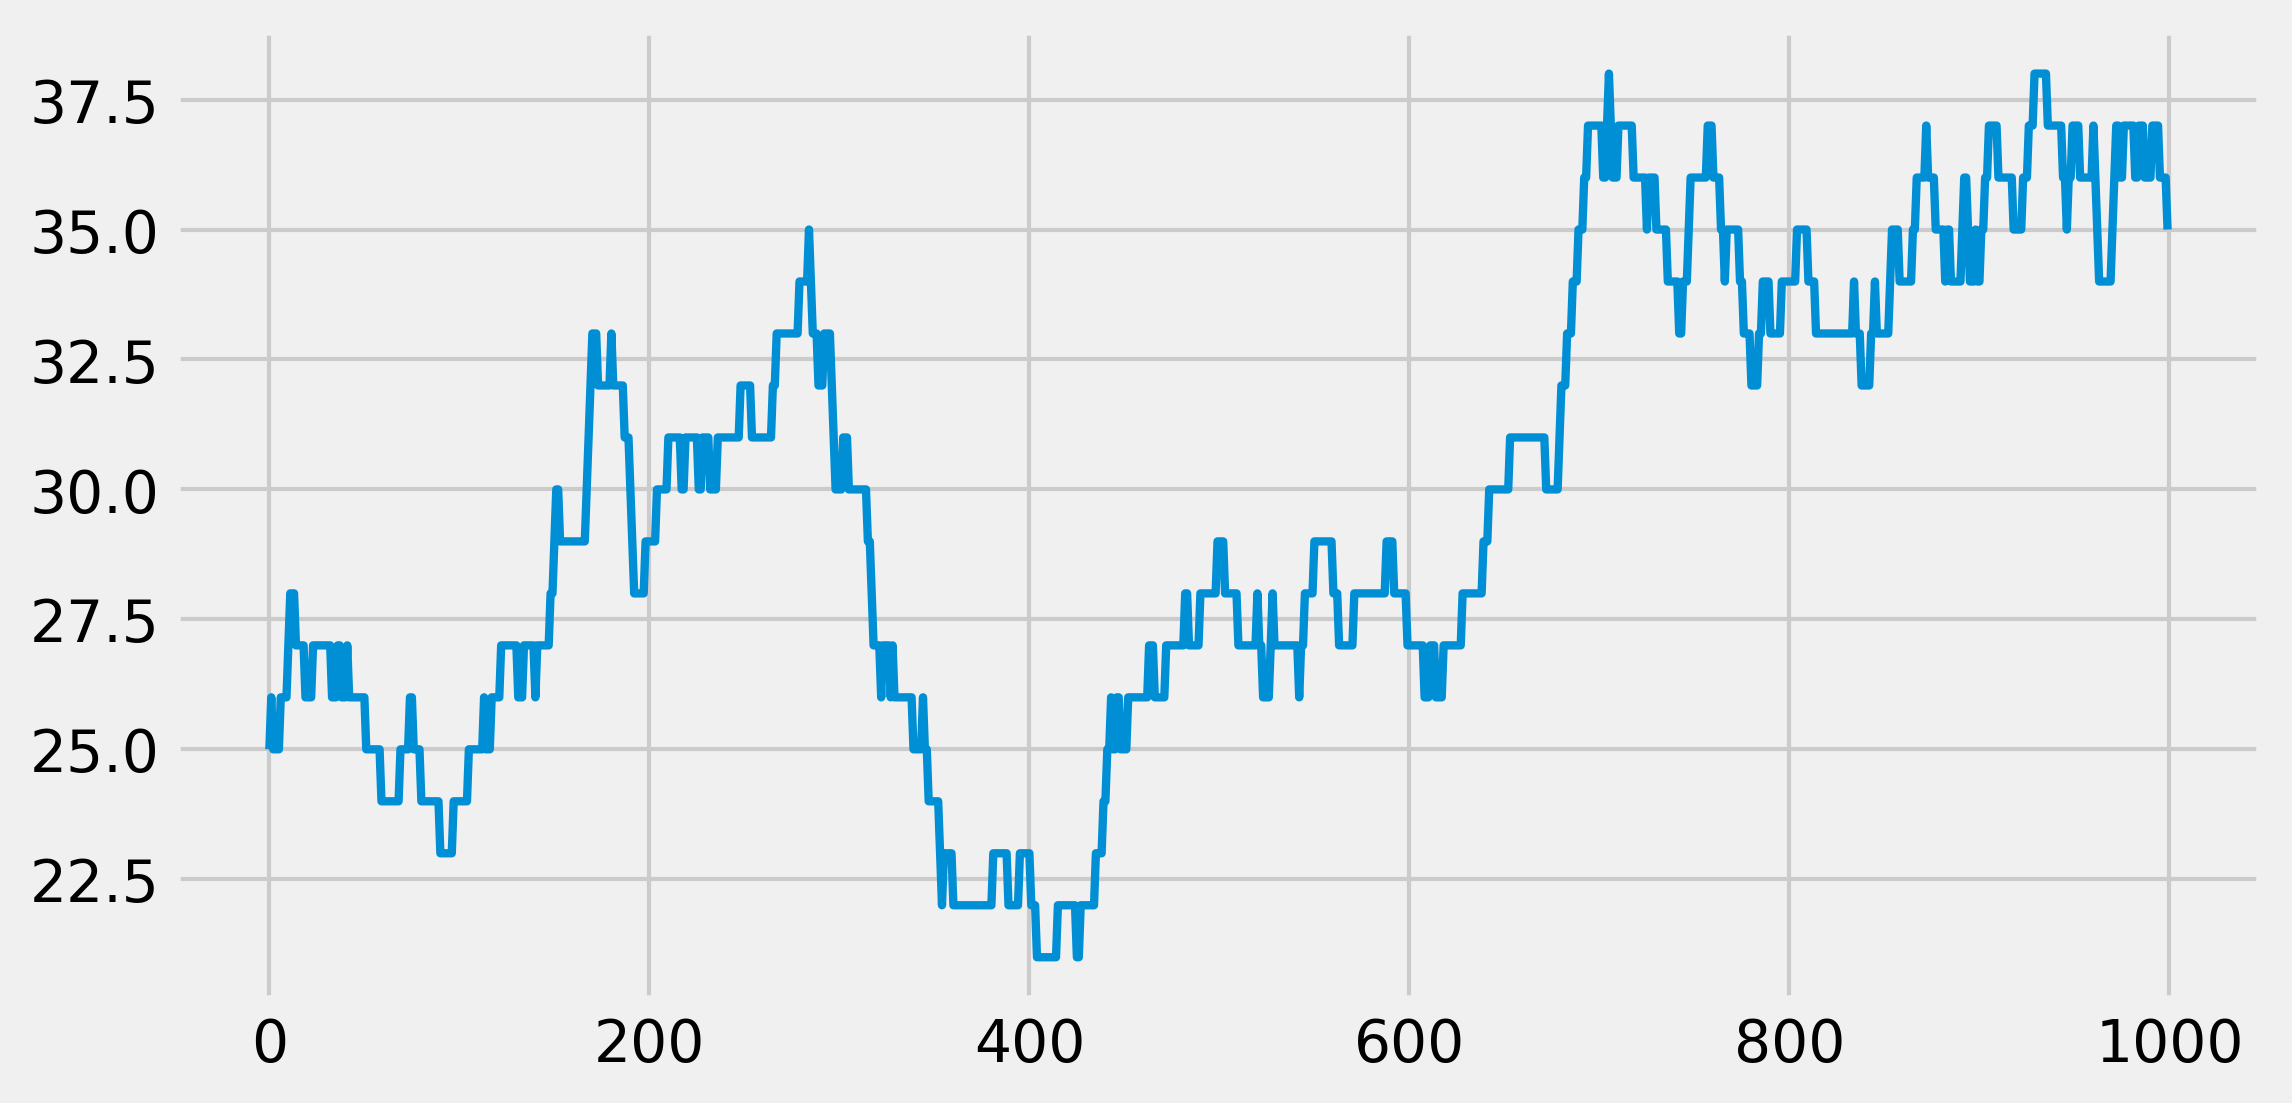

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, lw=2)

In [6]:
ntrials = 100
x = np.random.randint(size=ntrials,
                      low=0, high=N)

In [7]:
def simulate(x, nsteps):
    """Run the simulation."""
    for _ in range(nsteps - 1):
        # Which trials to update?
        upd = (0 < x) & (x < N - 1)
        # In which trials do births occur?
        birth = 1 * (np.random.rand(ntrials) <= a * x)
        # In which trials do deaths occur?
        death = 1 * (np.random.rand(ntrials) <= b * x)
        # We update the population size for all trials
        x[upd] += birth[upd] - death[upd]

In [8]:
bins = np.linspace(0, N, 25)

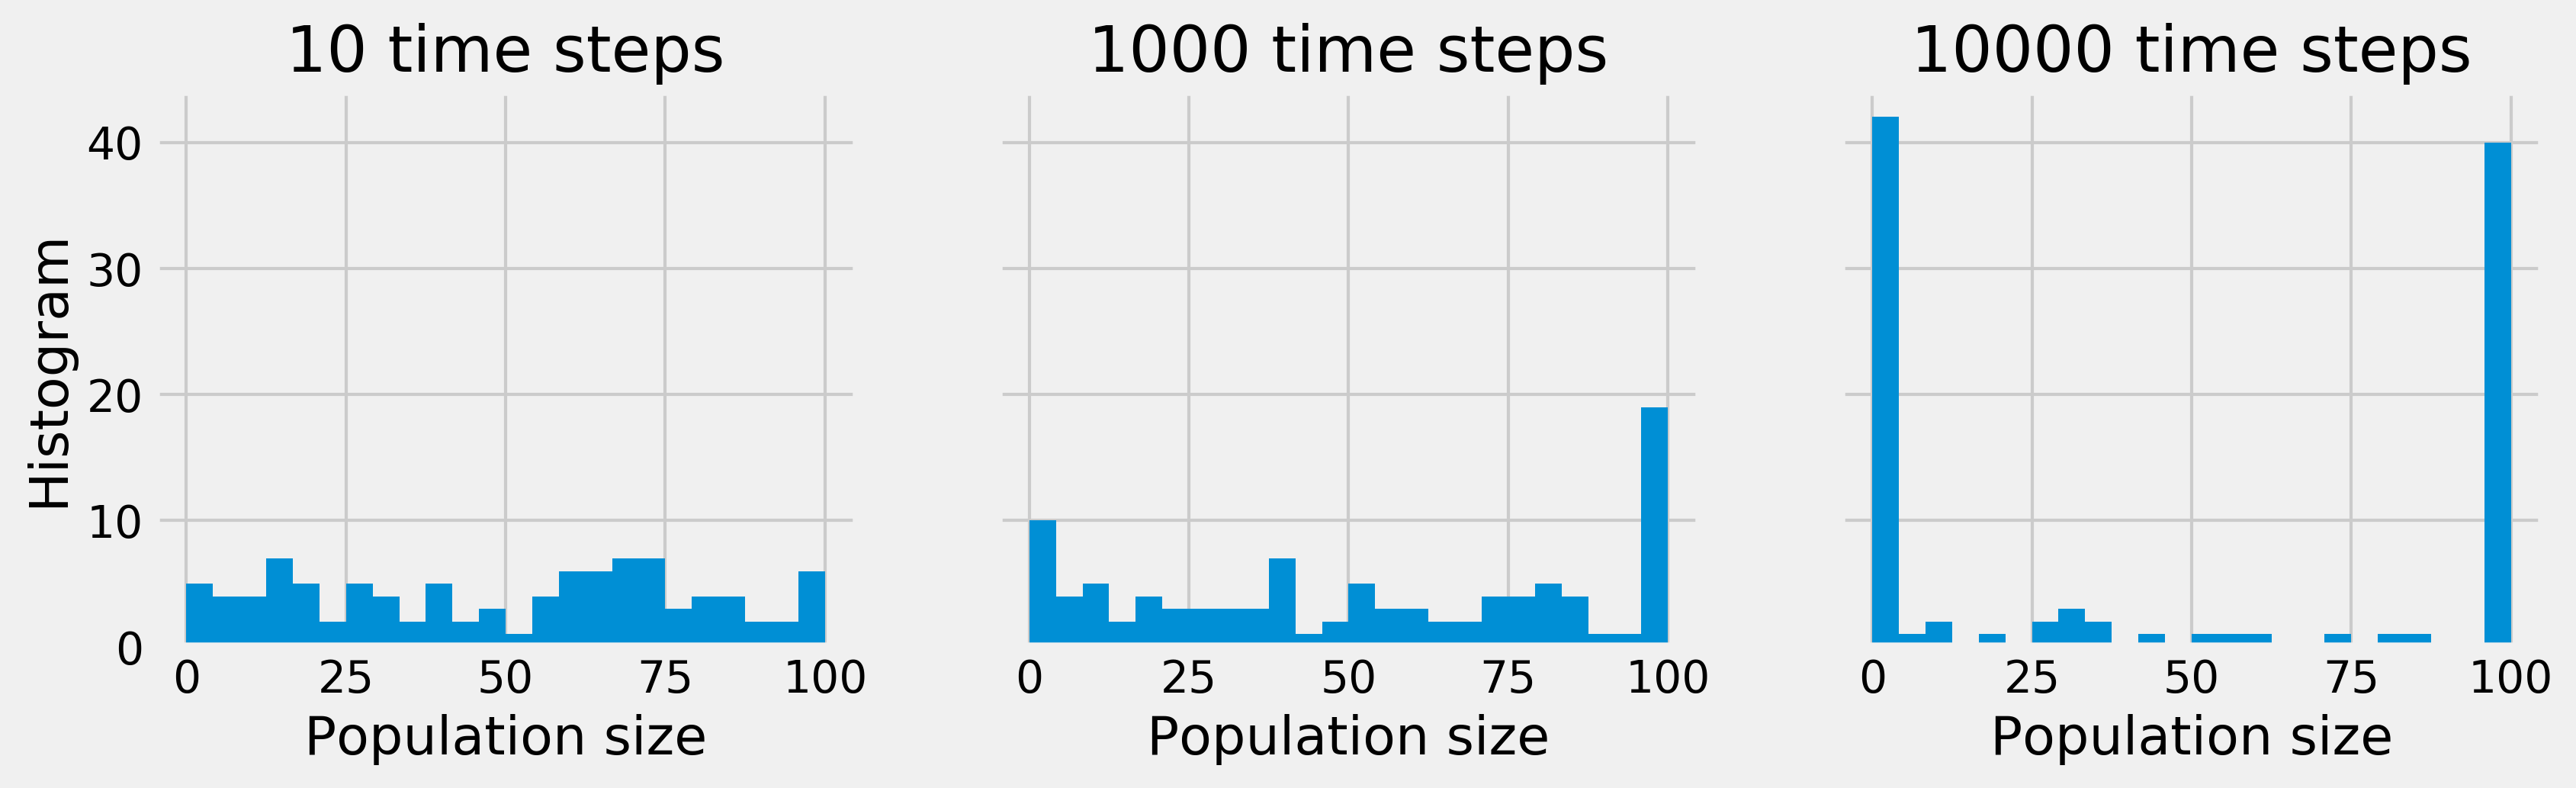

In [9]:
nsteps_list = [10, 1000, 10000]
fig, axes = plt.subplots(1, len(nsteps_list),
                         figsize=(12, 3),
                         sharey=True)
for i, nsteps in enumerate(nsteps_list):
    ax = axes[i]
    simulate(x, nsteps)
    ax.hist(x, bins=bins)
    ax.set_xlabel("Population size")
    if i == 0:
        ax.set_ylabel("Histogram")
    ax.set_title(f"{nsteps} time steps")